# <b>MODIS Water Notebook - Compare models with Boxplot </b>

Purpose: Used to perform statisvalidation of C61 MOD44W products from different models. Compares those products to the previous version, C6 MOD44W.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns


In [2]:
bxpt_file = 'MW_RFA_Statistics_No_P.csv'
df = pd.read_csv(bxpt_file).dropna()

In [5]:
df.var(numeric_only=True)

All_MCC       0.040207
Target_MCC    0.050355
EBC_MCC       0.000502
EBM_MCC       0.051570
All_Acc       0.001095
Target_Acc    0.003554
EBC_Acc       0.000049
EBM_Acc       0.002042
All_F1        0.054976
Target_F1     0.065342
EBC_F1        0.000586
EBM_F1        0.069912
dtype: float64

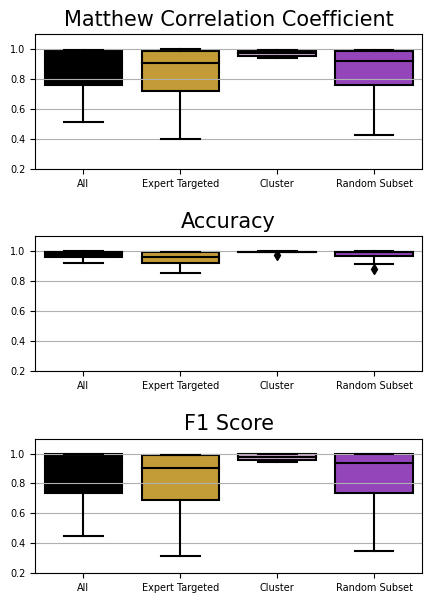

In [3]:

colors = ['black','goldenrod','plum','darkorchid'] #,'lightblue','darkblue']
models = ['All','Expert Targeted','Cluster','Random Subset'] #,'P Cluster','P Random Match']

mcc_data = df.loc[:,[col for col in df.columns if 'MCC' in col]]
mcc_data = mcc_data.rename(columns=dict(zip(mcc_data.columns,models)))
mcc_colors = dict(zip(mcc_data.columns,colors))

acc_data = df.loc[:,[col for col in df.columns if 'Acc' in col]]
acc_data = acc_data.rename(columns=dict(zip(acc_data.columns,models)))
acc_colors = dict(zip(acc_data.columns,colors))

f1_data = df.loc[:,[col for col in df.columns if 'F1' in col]]
f1_data = f1_data.rename(columns=dict(zip(f1_data.columns,models)))
f1_colors = dict(zip(f1_data.columns,colors))


fig, axes = plt.subplots(3,1,figsize=(5, 7))
plt.subplots_adjust(hspace=0.5)

label_size = 7
axes[0].tick_params(axis='both', which='major', labelsize=label_size) 
axes[1].tick_params(axis='both', which='major', labelsize=label_size) 
axes[2].tick_params(axis='both', which='major', labelsize=label_size) 

sns.boxplot(data=mcc_data,ax=axes[0],palette=mcc_colors)
sns.boxplot(data=acc_data,ax=axes[1],palette=acc_colors)
sns.boxplot(data=f1_data,ax=axes[2],palette=f1_colors)

axes[0].set_title('Matthew Correlation Coefficient',size=15)
axes[1].set_title('Accuracy',size=15)
axes[2].set_title('F1 Score',size=15)


axes[0].set_ylim([0.2,1.1])
axes[1].set_ylim([0.2,1.1])
axes[2].set_ylim([0.2,1.1])

axes[0].yaxis.grid(True)
axes[1].yaxis.grid(True)
axes[2].yaxis.grid(True)

# axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=10)

plt.show()


### <b>DO NOT RUN THIS CELL UNTIL FINISHED WITH VALIDATION</b>
*Note: This will shut down the local tile servers*

*Ignore warnings as such:*
```
Server for key (default) not found.
```

In [ ]:
for path_to_delete in temporary_files_to_delete:
    if os.path.exists(path_to_delete):
        os.remove(path_to_delete)
    temporary_files_to_delete.remove(path_to_delete)

mod44w_rfa_v1_water_client.shutdown(True)